# This notebook compares the true kernel and Random Fourier Features approximation in terms of:
## 1. Time taken to fit and train data
## 2. Test Performance (Error Rate & RMSE)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
%matplotlib inline 
from matplotlib import pyplot as plt

## Fashion MNIST (classification)

In [2]:
rff_errors = np.load("data/rff_errors_fashion.npy")
rff_times = np.load('data/rff_times_fashion.npy')
Ds = np.load('data/Ds_fashion.npy')
error_time = np.load('data/error_time_fashion.npy')
error = error_time[0]
t_exact_svm = error_time[1]

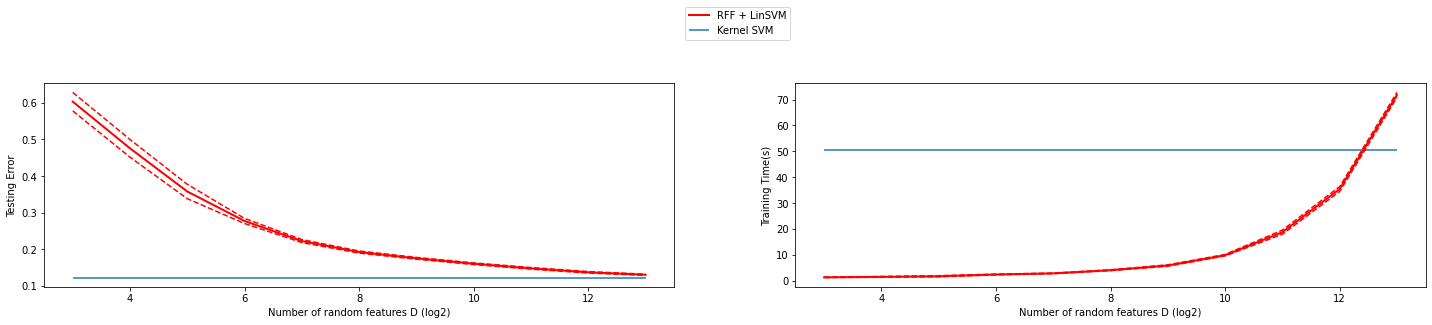

In [3]:
logDs = np.log2(Ds)
f = plt.figure(figsize=(20,5))
plt.subplot(121)
mean = rff_errors.mean(axis=-1)
std = rff_errors.std(axis=-1)
plt.plot(logDs, mean, 'r', linewidth = 2,label="RFF + LinSVM")
plt.plot(logDs, mean-std, 'r--')
plt.plot(logDs, mean+std, 'r--')

plt.hlines(y = error, xmin = min(logDs), xmax = max(logDs), label="Kernel SVM")
plt.ylabel("Testing Error")
plt.xlabel("Number of random features D (log2)")

plt.subplot(122)
mean = rff_times.mean(axis=-1)
std = rff_times.std(axis=-1)
plt.plot(logDs, mean, 'r', linewidth=2, label="RFF + LinSVM")
plt.plot(logDs, mean-std, 'r--')
plt.plot(logDs, mean+std, 'r--')
plt.hlines(y = t_exact_svm, xmin = min(logDs), xmax = max(logDs), label="Kernel SVM")
plt.ylabel("Training Time(s)")
plt.xlabel("Number of random features D (log2)")
plt.legend(bbox_to_anchor=[0,1.4])
plt.tight_layout()

## California Housing (Regression)

In [4]:
rff_rmse = np.load("data/rff_rmse_housing.npy")
rff_times = np.load('data/rff_times_housing.npy')
Ds = np.load('data/Ds_housing.npy')
error_time = np.load('data/error_time_housing.npy')
error = error_time[0]
t_exact_ridge = error_time[1]

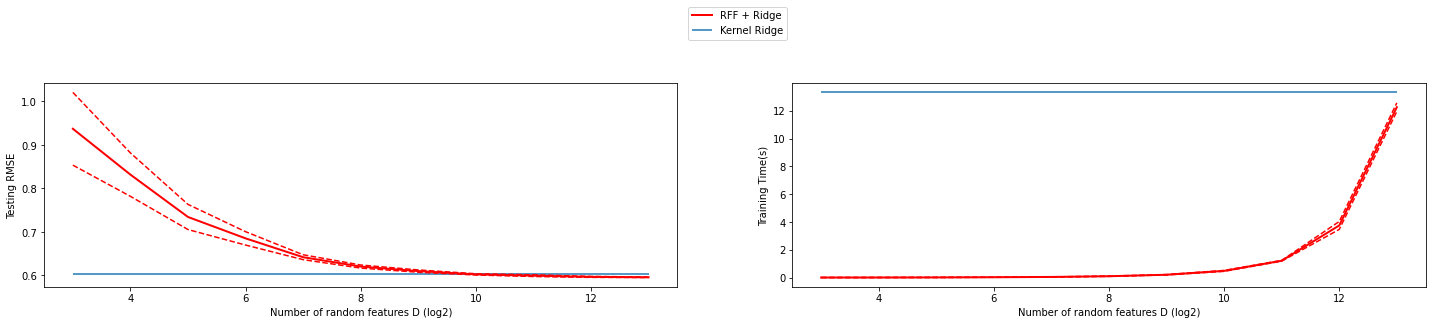

In [5]:
logDs = np.log2(Ds)
f = plt.figure(figsize=(20,5))
plt.subplot(121)
mean = rff_rmse.mean(axis=-1)
std = rff_rmse.std(axis=-1)
plt.plot(logDs, mean, 'r', linewidth = 2,label="RFF + Ridge")
plt.plot(logDs, mean-std, 'r--')
plt.plot(logDs, mean+std, 'r--')

plt.hlines(y = error, xmin = min(logDs), xmax = max(logDs), label="Kernel Ridge")
plt.ylabel("Testing RMSE")
plt.xlabel("Number of random features D (log2)")

plt.subplot(122)
mean = rff_times.mean(axis=-1)
std = rff_times.std(axis=-1)
plt.plot(logDs, mean, 'r', linewidth=2, label="RFF + Ridge")
plt.plot(logDs, mean-std, 'r--')
plt.plot(logDs, mean+std, 'r--')
plt.hlines(y = t_exact_ridge, xmin = min(logDs), xmax = max(logDs), label="Kernel Ridge")
plt.ylabel("Training Time(s)")
plt.xlabel("Number of random features D (log2)")
plt.legend(bbox_to_anchor=[0,1.4])
plt.tight_layout()